### Importing Necessary libraries

In [251]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

#For PCA
from sklearn.decomposition import PCA
from sklearn import metrics

# Form SVM Model
from sklearn import svm
from sklearn.svm import SVC

#For cross validation
from sklearn.model_selection import cross_val_score

#For Hyperparameterization
from sklearn.model_selection import GridSearchCV

from sklearn.model_selection import train_test_split
from sklearn.cluster import KMeans

In [252]:
#Reading the csv file "DATA-SET" from the home directory using pandas and assigning to 'data_frame'
DataFrame=pd.read_csv("vehicle.csv")

In [253]:
#To check data is loaded correctly
DataFrame.head()

compactness  circularity  distance_circularity  radius_ratio  \
0           95         48.0                  83.0         178.0   
1           91         41.0                  84.0         141.0   
2          104         50.0                 106.0         209.0   
3           93         41.0                  82.0         159.0   
4           85         44.0                  70.0         205.0   

   pr.axis_aspect_ratio  max.length_aspect_ratio  scatter_ratio  \
0                  72.0                       10          162.0   
1                  57.0                        9          149.0   
2                  66.0                       10          207.0   
3                  63.0                        9          144.0   
4                 103.0                       52          149.0   

   elongatedness  pr.axis_rectangularity  max.length_rectangularity  \
0           42.0                    20.0                        159   
1           45.0                    19.0                        143   
2           32.0                    23.0                        158   
3           46.0                    19.0                        143   
4           45.0                    19.0                        144   

   scaled_variance  scaled_variance.1  scaled_radius_of_gyration  \
0            176.0              379.0                      184.0   
1            170.0              330.0                      158.0   
2            223.0              635.0                      220.0   
3            160.0              309.0                      127.0   
4            241.0              325.0                      188.0   

   scaled_radius_of_gyration.1  skewness_about  skewness_about.1  \
0                         70.0             6.0              16.0   
1                         72.0             9.0              14.0   
2                         73.0            14.0               9.0   
3                         63.0             6.0              10.0   
4                        127.0             9.0              11.0   

   skewness_about.2  hollows_ratio class  
0             187.0            197   van  
1             189.0            199   van  
2             188.0            196   car  
3             199.0            207   van  
4             180.0            183   bus

In [254]:
#To get some info about the data
info=DataFrame.info()
info

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 846 entries, 0 to 845
Data columns (total 19 columns):
compactness                    846 non-null int64
circularity                    841 non-null float64
distance_circularity           842 non-null float64
radius_ratio                   840 non-null float64
pr.axis_aspect_ratio           844 non-null float64
max.length_aspect_ratio        846 non-null int64
scatter_ratio                  845 non-null float64
elongatedness                  845 non-null float64
pr.axis_rectangularity         843 non-null float64
max.length_rectangularity      846 non-null int64
scaled_variance                843 non-null float64
scaled_variance.1              844 non-null float64
scaled_radius_of_gyration      844 non-null float64
scaled_radius_of_gyration.1    842 non-null float64
skewness_about                 840 non-null float64
skewness_about.1               845 non-null float64
skewness_about.2               845 non-null float64
hollows_ratio    

In [255]:
#To find the shape of the dataframe
shape=DataFrame.shape
print("The shape of Data frame is"+str(shape))

The shape of Data frame is(846, 19)


In [256]:
#To find the data-types of columns in data set
d_types=DataFrame.dtypes
d_types

compactness                      int64
circularity                    float64
distance_circularity           float64
radius_ratio                   float64
pr.axis_aspect_ratio           float64
max.length_aspect_ratio          int64
scatter_ratio                  float64
elongatedness                  float64
pr.axis_rectangularity         float64
max.length_rectangularity        int64
scaled_variance                float64
scaled_variance.1              float64
scaled_radius_of_gyration      float64
scaled_radius_of_gyration.1    float64
skewness_about                 float64
skewness_about.1               float64
skewness_about.2               float64
hollows_ratio                    int64
class                           object
dtype: object

In [257]:
#To check if there are any null values in the data_Set
null_table=DataFrame.isnull().values.any()
null_table

True

#### There are some null values present and this will be removed in future

In [258]:
# To check which column has null values
DataFrame.isnull().sum()

compactness                    0
circularity                    5
distance_circularity           4
radius_ratio                   6
pr.axis_aspect_ratio           2
max.length_aspect_ratio        0
scatter_ratio                  1
elongatedness                  1
pr.axis_rectangularity         3
max.length_rectangularity      0
scaled_variance                3
scaled_variance.1              2
scaled_radius_of_gyration      2
scaled_radius_of_gyration.1    4
skewness_about                 6
skewness_about.1               1
skewness_about.2               1
hollows_ratio                  0
class                          0
dtype: int64

In [259]:
# To describe the Dataframe
DataFrame.describe().T

count        mean         std    min     25%  \
compactness                  846.0   93.678487    8.234474   73.0   87.00   
circularity                  841.0   44.828775    6.152172   33.0   40.00   
distance_circularity         842.0   82.110451   15.778292   40.0   70.00   
radius_ratio                 840.0  168.888095   33.520198  104.0  141.00   
pr.axis_aspect_ratio         844.0   61.678910    7.891463   47.0   57.00   
max.length_aspect_ratio      846.0    8.567376    4.601217    2.0    7.00   
scatter_ratio                845.0  168.901775   33.214848  112.0  147.00   
elongatedness                845.0   40.933728    7.816186   26.0   33.00   
pr.axis_rectangularity       843.0   20.582444    2.592933   17.0   19.00   
max.length_rectangularity    846.0  147.998818   14.515652  118.0  137.00   
scaled_variance              843.0  188.631079   31.411004  130.0  167.00   
scaled_variance.1            844.0  439.494076  176.666903  184.0  318.00   
scaled_radius_of_gyration    844.0  174.709716   32.584808  109.0  149.00   
scaled_radius_of_gyration.1  842.0   72.447743    7.486190   59.0   67.00   
skewness_about               840.0    6.364286    4.920649    0.0    2.00   
skewness_about.1             845.0   12.602367    8.936081    0.0    5.00   
skewness_about.2             845.0  188.919527    6.155809  176.0  184.00   
hollows_ratio                846.0  195.632388    7.438797  181.0  190.25   

                               50%    75%     max  
compactness                   93.0  100.0   119.0  
circularity                   44.0   49.0    59.0  
distance_circularity          80.0   98.0   112.0  
radius_ratio                 167.0  195.0   333.0  
pr.axis_aspect_ratio          61.0   65.0   138.0  
max.length_aspect_ratio        8.0   10.0    55.0  
scatter_ratio                157.0  198.0   265.0  
elongatedness                 43.0   46.0    61.0  
pr.axis_rectangularity        20.0   23.0    29.0  
max.length_rectangularity    146.0  159.0   188.0  
scaled_variance              179.0  217.0   320.0  
scaled_variance.1            363.5  587.0  1018.0  
scaled_radius_of_gyration    173.5  198.0   268.0  
scaled_radius_of_gyration.1   71.5   75.0   135.0  
skewness_about                 6.0    9.0    22.0  
skewness_about.1              11.0   19.0    41.0  
skewness_about.2             188.0  193.0   206.0  
hollows_ratio                197.0  201.0   211.0

### Exploratory data analysis

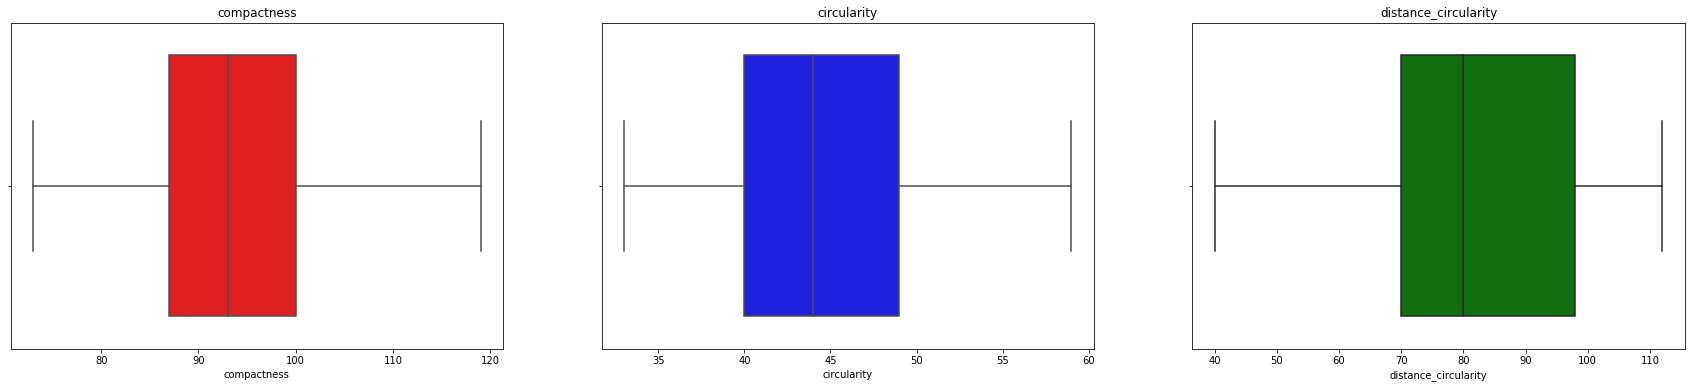

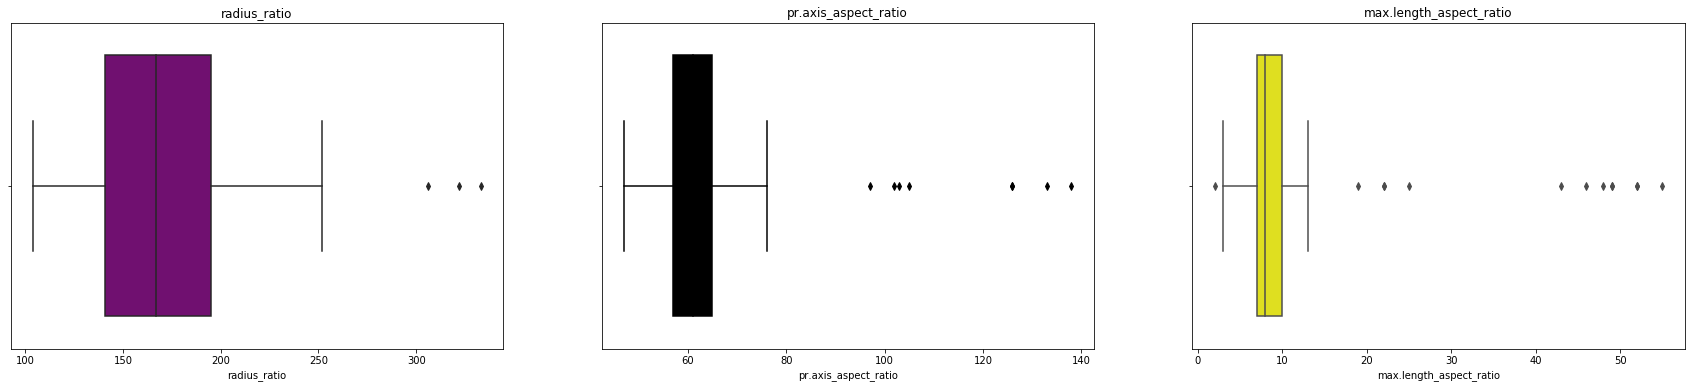

In [260]:
### Visuvalizing Boxplot of each columns
plt.figure(figsize=(30,6))

#Subplot 1- Boxplot
plt.subplot(1,3,1)
plt.title('compactness')
sns.boxplot(DataFrame['compactness'],orient='horizondal',color='red')

#Subplot 2
plt.subplot(1,3,2)
plt.title('circularity')
sns.boxplot(DataFrame['circularity'],orient='horizondal',color='blue')

#Subplot 3
plt.subplot(1,3,3)
plt.title('distance_circularity')
sns.boxplot(DataFrame['distance_circularity'],orient='horizondal',color='green')

plt.figure(figsize=(30,6))

#Subplot 1
plt.subplot(1,3,1)
plt.title('radius_ratio')
sns.boxplot(DataFrame['radius_ratio'],orient='horizondal',color='purple')

#Subplot 2
plt.subplot(1,3,2)
plt.title('pr.axis_aspect_ratio')
sns.boxplot(DataFrame['pr.axis_aspect_ratio'],orient='horizondal',color='black')
  

#Subplot 3
plt.subplot(1,3,3)
plt.title('max.length_aspect_ratio')
sns.boxplot(DataFrame['max.length_aspect_ratio'],orient='horizondal',color='yellow')
               

#### Compactness mostly ranges from 88 to 100 
#### Circularity mostly ranges from 40 to 50
#### Distance circularity mostly ranges from 70 to 100
#### Radius_ratio mostly ranges from 140 to 200 with few outliers
#### pr.axis_aspect_ratio mostly ranges from 55 to 65 with some outliers
#### max.length_aspect_ration ranges from 8 to 11 with more outliers

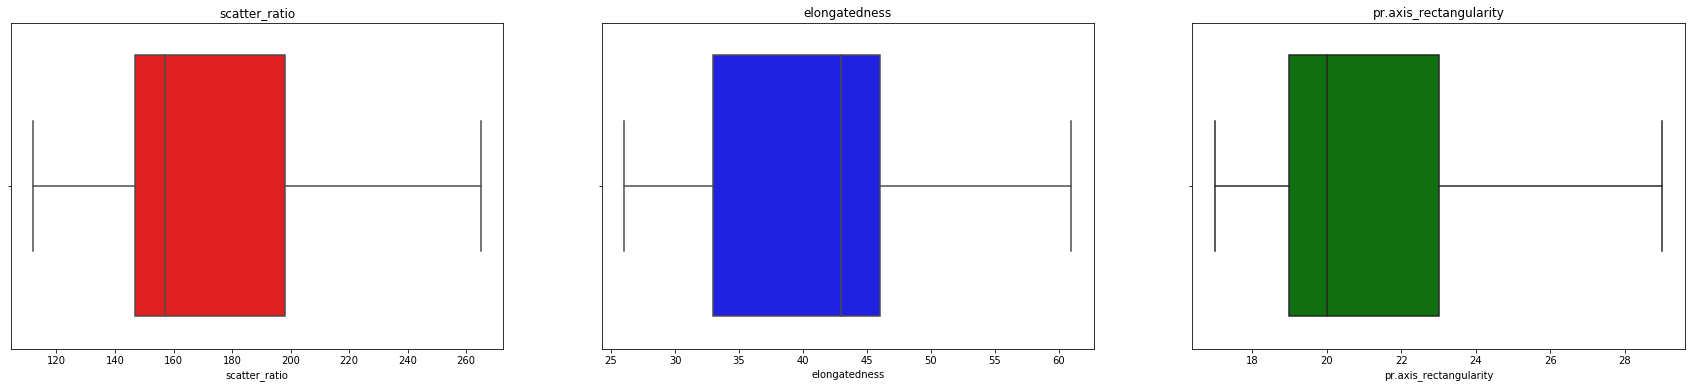

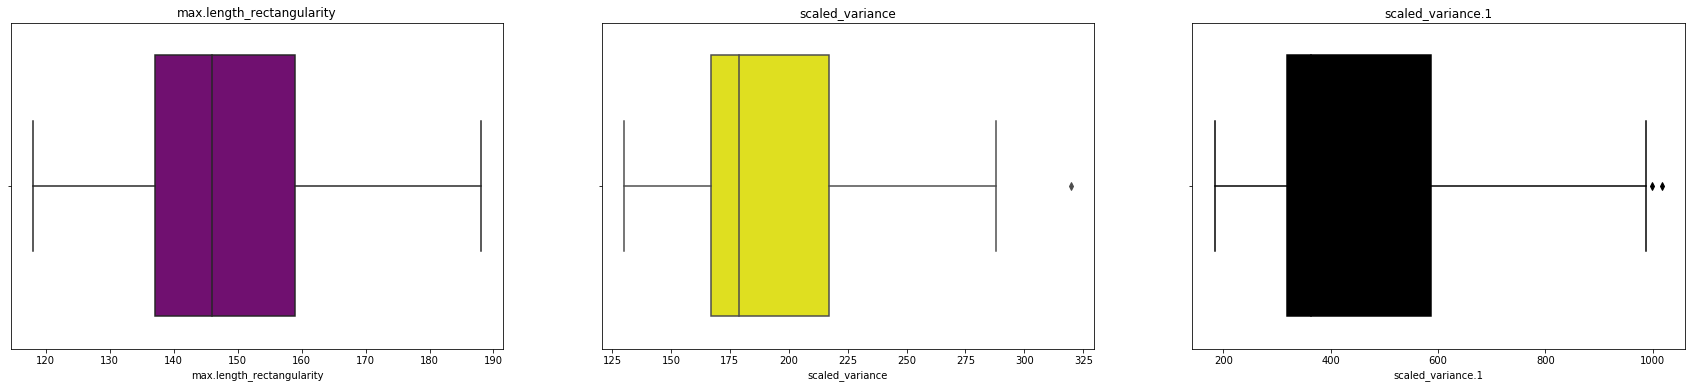

In [261]:
plt.figure(figsize=(30,6))

#Subplot 1- Boxplot
plt.subplot(1,3,1)
plt.title('scatter_ratio')
sns.boxplot(DataFrame['scatter_ratio'],orient='horizondal',color='red')

#Subplot 2
plt.subplot(1,3,2)
plt.title('elongatedness')
sns.boxplot(DataFrame['elongatedness'],orient='horizondal',color='blue')

#Subplot 3
plt.subplot(1,3,3)
plt.title('pr.axis_rectangularity')
sns.boxplot(DataFrame['pr.axis_rectangularity'],orient='horizondal',color='green')

plt.figure(figsize=(30,6))

#Subplot 1
plt.subplot(1,3,1)
plt.title('max.length_rectangularity')
sns.boxplot(DataFrame['max.length_rectangularity'],orient='horizondal',color='purple')

#Subplot 2
plt.subplot(1,3,2)
plt.title('scaled_variance')
sns.boxplot(DataFrame['scaled_variance'],orient='horizondal',color='yellow')
  

#Subplot 3
plt.subplot(1,3,3)
plt.title('scaled_variance.1')
sns.boxplot(DataFrame['scaled_variance.1'],orient='horizondal',color='black')

#### Scatter ratio mostly ranges from 145 to 200
#### Elongatedness mostly ranges from 33 to 47
#### Pr.axis_rectangularity mostly ranges from 19 to 23
#### Max.length_rectangularity mostly ranges from 138 to 160 
#### Scaled_variance mostly ranges from 160 to 220 with very few outliers
#### Scaled_variance mostly ranges from 300 to 600

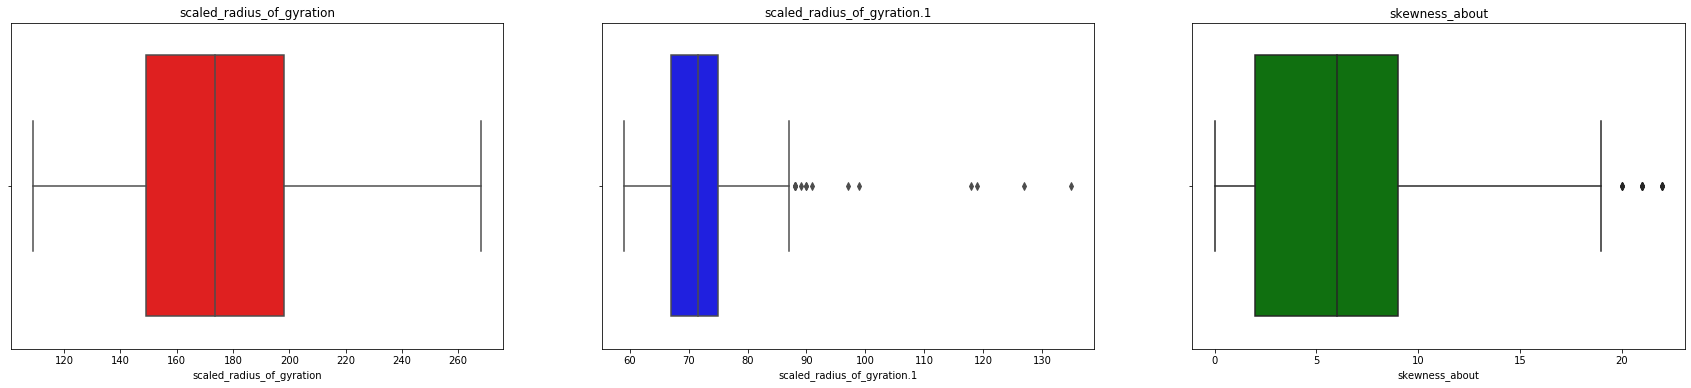

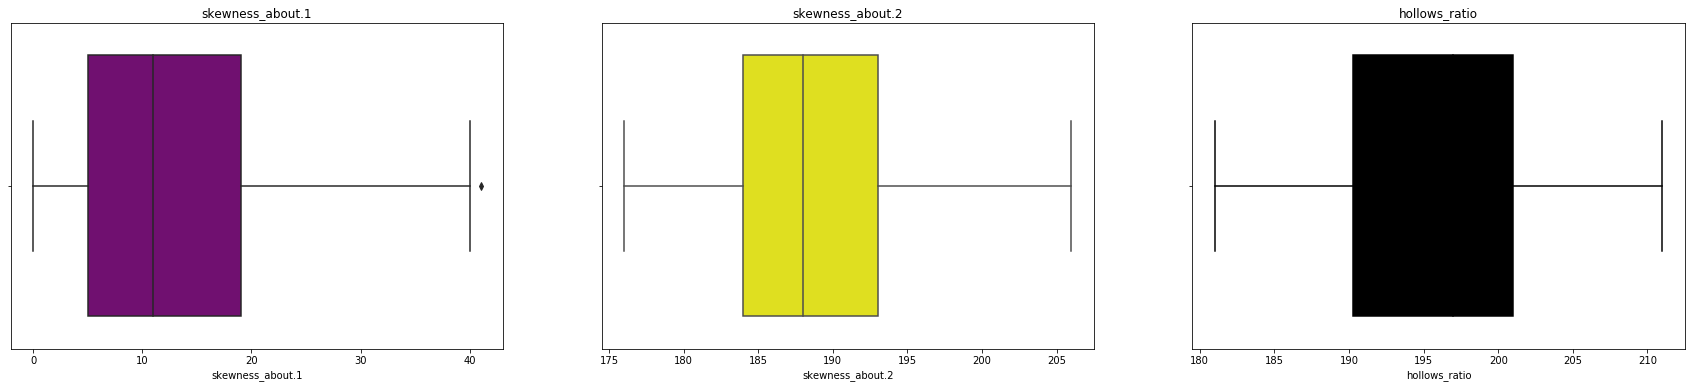

In [262]:
plt.figure(figsize=(30,6))

#Subplot 1- Boxplot
plt.subplot(1,3,1)
plt.title('scaled_radius_of_gyration')
sns.boxplot(DataFrame['scaled_radius_of_gyration'],orient='horizondal',color='red')

#Subplot 2
plt.subplot(1,3,2)
plt.title('scaled_radius_of_gyration.1')
sns.boxplot(DataFrame['scaled_radius_of_gyration.1'],orient='horizondal',color='blue')

#Subplot 3
plt.subplot(1,3,3)
plt.title('skewness_about')
sns.boxplot(DataFrame['skewness_about'],orient='horizondal',color='green')

plt.figure(figsize=(30,6))

#Subplot 1
plt.subplot(1,3,1)
plt.title('skewness_about.1')
sns.boxplot(DataFrame['skewness_about.1'],orient='horizondal',color='purple')

#Subplot 2
plt.subplot(1,3,2)
plt.title('skewness_about.2')
sns.boxplot(DataFrame['skewness_about.2'],orient='horizondal',color='yellow')
  

#Subplot 3
plt.subplot(1,3,3)
plt.title('hollows_ratio')
sns.boxplot(DataFrame['hollows_ratio'],orient='horizondal',color='black')

#### Skewness_about_1 mostly ranges from 145 to 200
#### Scaled_radius_of_gyration_1 mostly ranges from 65 to 75 with some outliers
#### Skewness_about mostly ranges from 2 to 10 with some outliers
#### Skewness_about_1 mostly ranges from 5 to 20 with some outliers
#### Skewness_about_2 mostly ranges from 182 to 192 
#### Hollows ratio mostly ranges from 190 to 205 

### Distribution of Target column

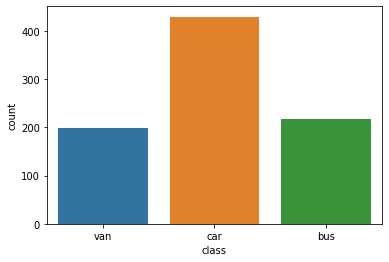

In [263]:
sns.countplot(DataFrame['class'])

#### Car has more values and next to it is bus and van has least count

### Multi variate Analysis

/home/raja/Documents/anaconda3/lib/python3.7/site-packages/statsmodels/nonparametric/kde.py:447: RuntimeWarning: invalid value encountered in greater
  X = X[np.logical_and(X > clip[0], X < clip[1])] # won't work for two columns.
/home/raja/Documents/anaconda3/lib/python3.7/site-packages/statsmodels/nonparametric/kde.py:447: RuntimeWarning: invalid value encountered in less
  X = X[np.logical_and(X > clip[0], X < clip[1])] # won't work for two columns.


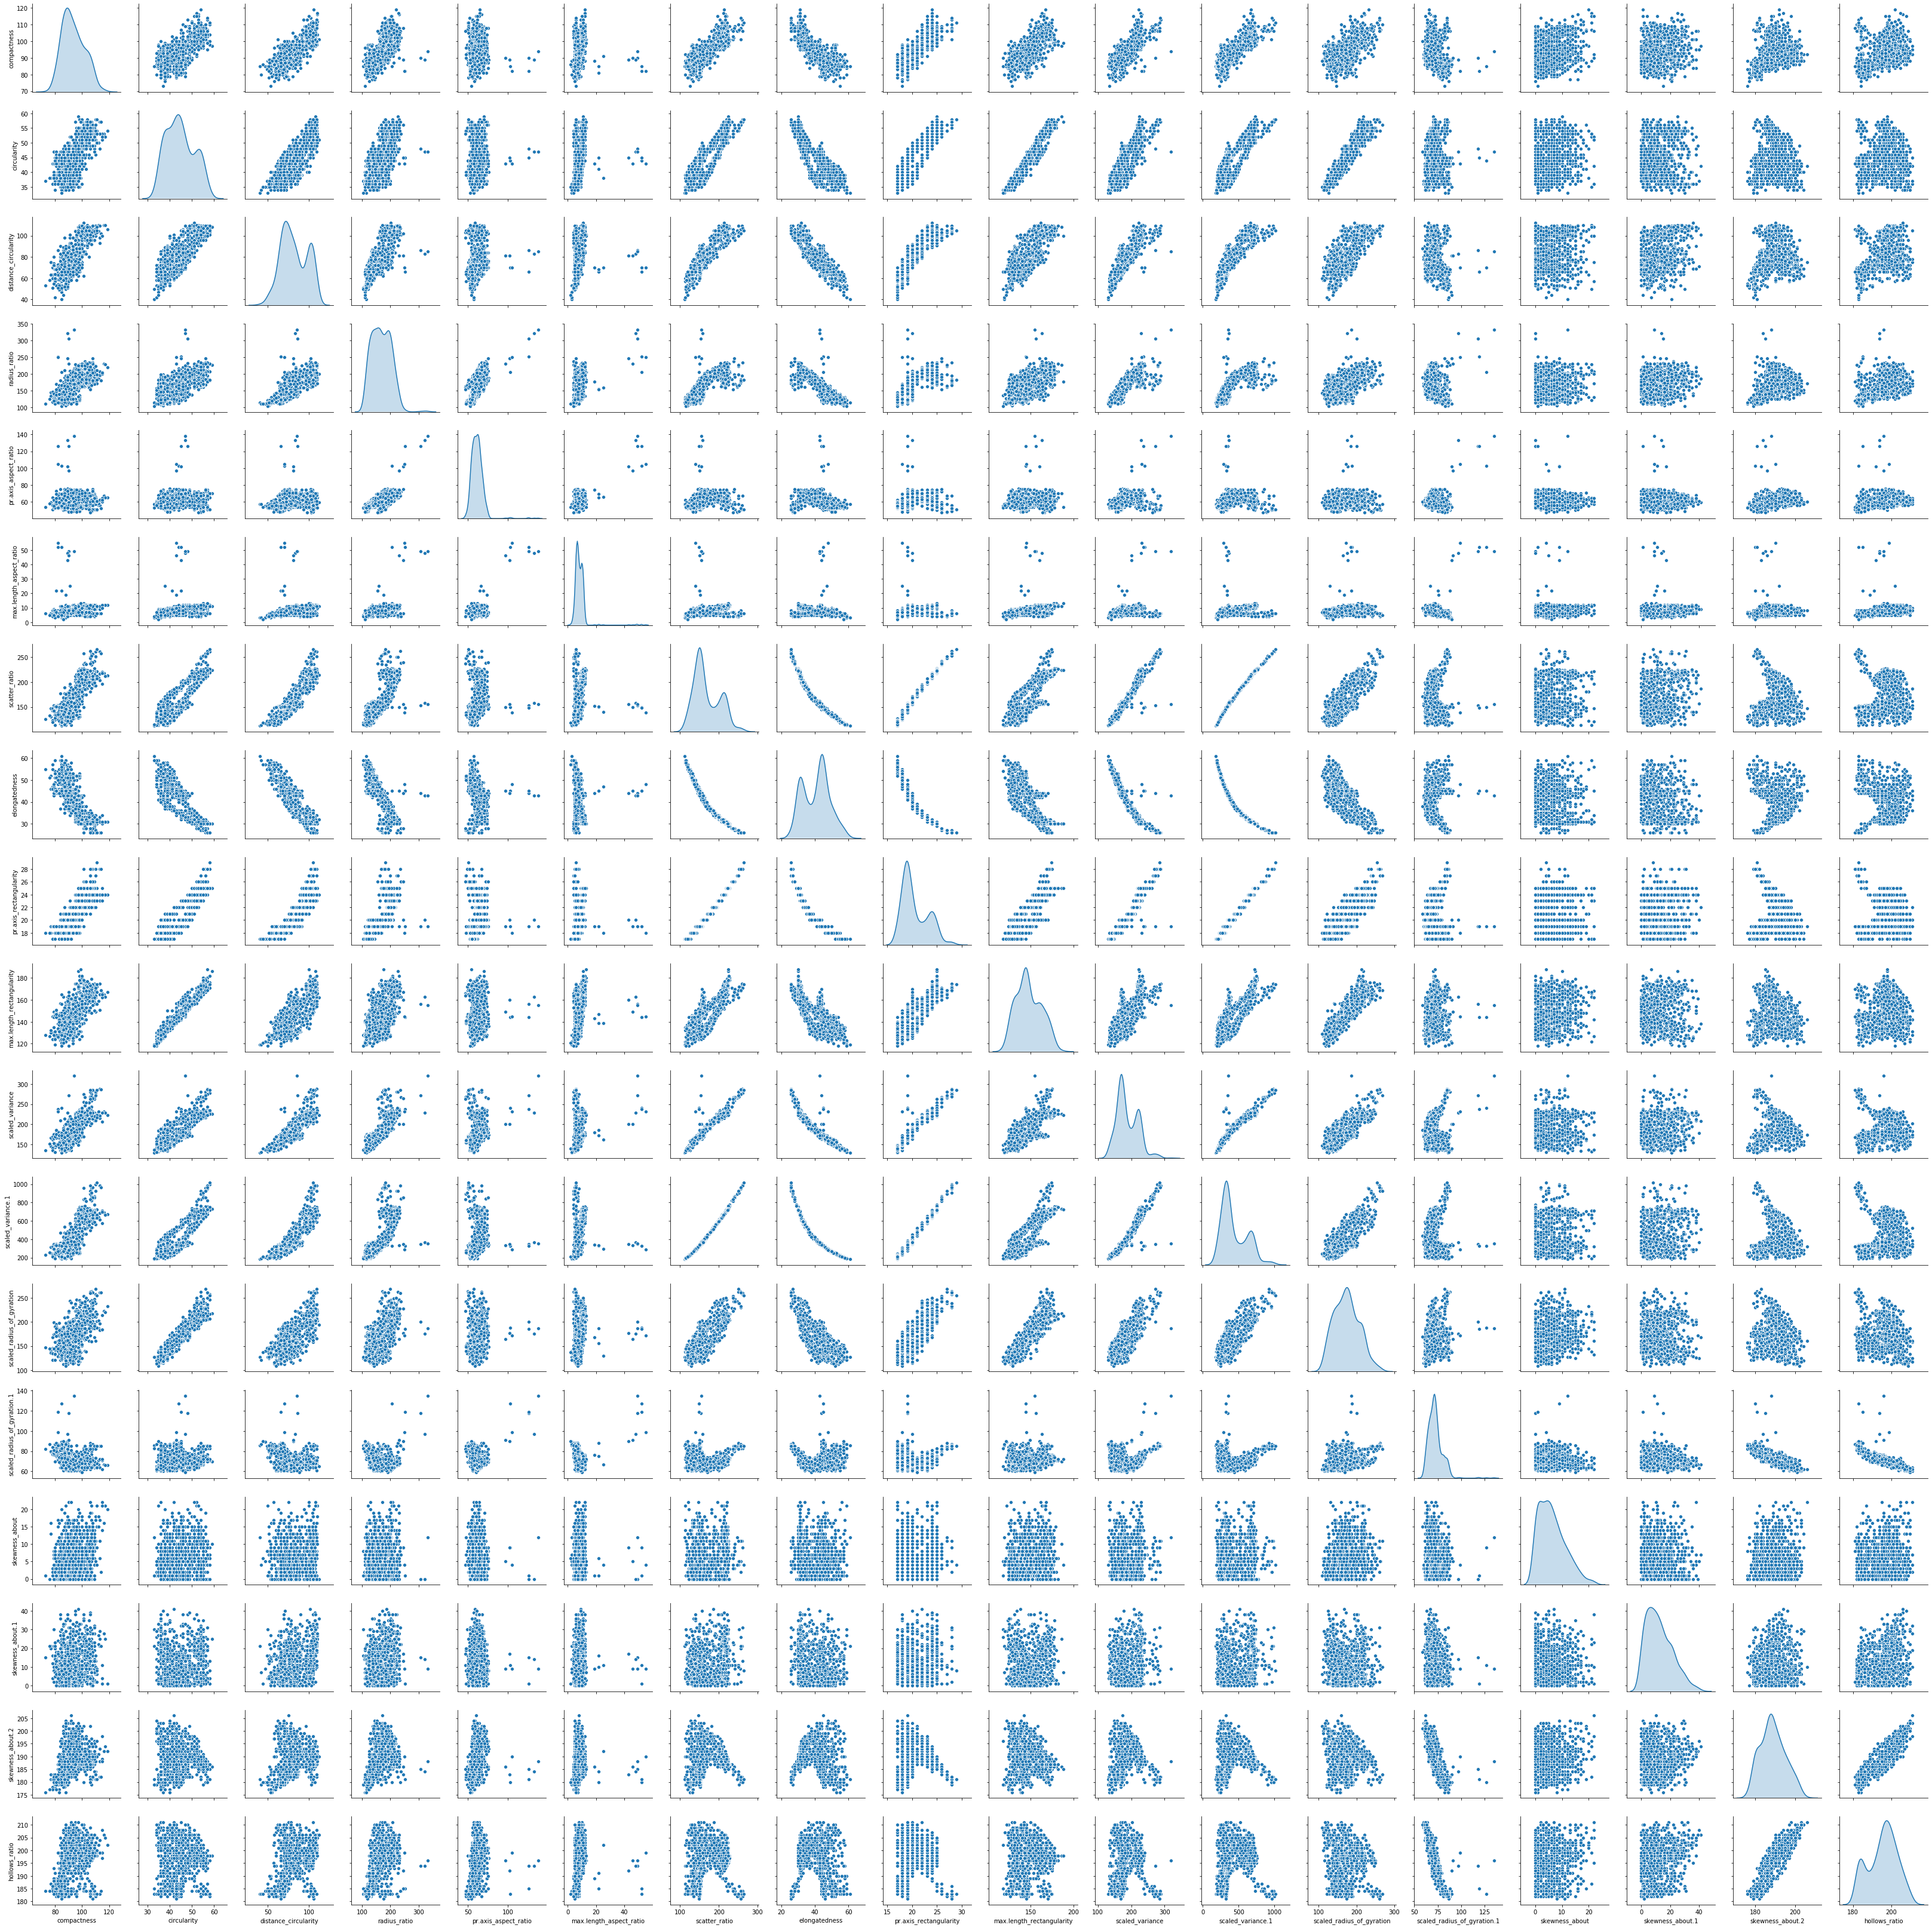

In [264]:
sns.pairplot(DataFrame,diag_kind="kde")

In [265]:
#To find the correlation between the continous variables
correlation=DataFrame.corr()
correlation.style.background_gradient(cmap='coolwarm')

##### Columns like pr.axis_rectangularity and scatter_ratio are highly correlated with value of 0.99
##### Also scaled variance and scaled variance.1 are highly correlated
##### In additional there are many columns which are highly correlated with each other
##### There are 18 columns we can remove the any one of the column which is highly correlated to reduce the computation complexity

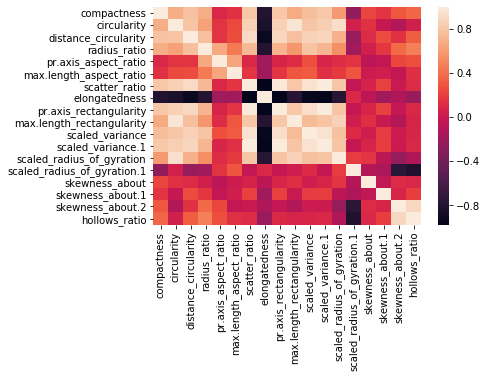

In [266]:
sns.heatmap(correlation)

#### Most of the columns are much correlated to each other so we should reduce the dimensionality for complexity reduction

#### Refining the Data

In [267]:
## Filling the null value with mean value
DataFrame=DataFrame.fillna(DataFrame.mean()) 

In [268]:
#Seperating the columns which is int and float type for applying Z-scores
cols=[]
for col in DataFrame[:]:
    if DataFrame[col].dtypes=='float64' or DataFrame[col].dtypes=='int64' :
        cols.append(col)

In [269]:
#Calculating Z_score to normalize the data 
for col in cols:
    cols_zscore=col+'_zscore'
    DataFrame[cols_zscore]=(DataFrame[col]-DataFrame[col].mean())/DataFrame[col].std(ddof=0)

In [270]:
#Dropping the cols for which we have calculated Z score
DataFrame.drop(cols,axis=1,inplace= True)

### Handling outliers by removing the rows which has more than 3 Z-scores and also less than -3 Z-scores

In [271]:
floats = DataFrame.columns[DataFrame.dtypes == 'float64']
#The float values are Z score values so targeting them

for x in floats:
    Z_Score_larger = DataFrame[ DataFrame[x]>3].index
    Z_Score_lesser = DataFrame[ DataFrame[x]<-3].index
    # Delete these row indexes from dataFrame
    DataFrame.drop(Z_Score_larger , inplace=True)
    DataFrame.drop(Z_Score_lesser , inplace=True)
DataFrame.shape

(824, 19)

#### Totally 22 rows were filtered from data frame

###  PCA(Principal Component Analysis) Model building

In [272]:
#Dropping the dependent variable 
PCA_DataFrame=DataFrame.drop(['class'],axis=1)

In [273]:
#Creating the model and fitting the model
pca = PCA(n_components=18)
pca.fit(PCA_DataFrame)

PCA(copy=True, iterated_power='auto', n_components=18, random_state=None,
    svd_solver='auto', tol=0.0, whiten=False)

In [274]:
# Eigen Values of the model
print(pca.explained_variance_)

[9.15819800e+00 2.90750228e+00 1.15335262e+00 9.36472925e-01
 5.22339566e-01 4.62414955e-01 2.24413111e-01 2.05532292e-01
 9.97152163e-02 6.52928971e-02 5.73002133e-02 4.22281447e-02
 2.84788966e-02 2.22840592e-02 1.69568975e-02 1.55025186e-02
 8.98943528e-03 3.09569363e-03]


In [275]:
# Eigen Vector of the model
print(pca.components_)

[[ 2.76449338e-01  2.94590886e-01  3.09496026e-01  2.69682237e-01
   7.48701554e-02  8.88300360e-02  3.15724114e-01 -3.17739386e-01
   3.11526333e-01  2.83972263e-01  3.01110919e-01  3.11185121e-01
   2.66763605e-01 -4.64121946e-02  3.93684770e-02  6.04107858e-02
   4.46794016e-02  9.18365722e-02]
 [-1.13671749e-01  1.48256995e-01 -5.53035055e-02 -2.02529952e-01
  -1.72494763e-01 -3.20314731e-02  6.19425812e-02 -3.01249345e-03
   7.37510326e-02  1.38194982e-01  5.40779454e-02  6.42186637e-02
   2.22908857e-01  4.50601852e-01 -3.59790925e-02 -1.19636567e-01
  -5.46970126e-01 -5.35999703e-01]
 [ 6.91817020e-02  1.92154955e-01 -7.66519103e-02 -3.30647868e-02
   5.33622860e-02  2.66213669e-02 -9.95854728e-02  8.34634445e-02
  -9.64020904e-02  1.90196532e-01 -1.20957434e-01 -9.38338813e-02
   2.05602991e-01 -7.30758965e-02  5.74394394e-01 -6.83433880e-01
   1.18455987e-01  5.76459786e-02]
 [ 1.33092447e-01 -6.67685412e-02  6.62364045e-02 -1.61921822e-01
  -3.08775587e-01  2.13972544e-02  1.

In [276]:
#Ratio of the variance
print(pca.explained_variance_ratio_)

[5.74900057e-01 1.82516607e-01 7.24009777e-02 5.87864926e-02
 3.27895342e-02 2.90278048e-02 1.40873904e-02 1.29021590e-02
 6.25955931e-03 4.09872011e-03 3.59698446e-03 2.65084494e-03
 1.78774463e-03 1.39886765e-03 1.06445846e-03 9.73160749e-04
 5.64306085e-04 1.94330200e-04]


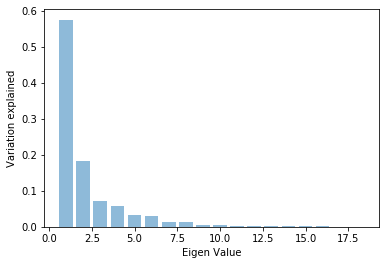

In [277]:
plt.bar(list(range(1,19)),pca.explained_variance_ratio_,alpha=0.5, align='center')
plt.ylabel('Variation explained')
plt.xlabel('Eigen Value')
plt.show()

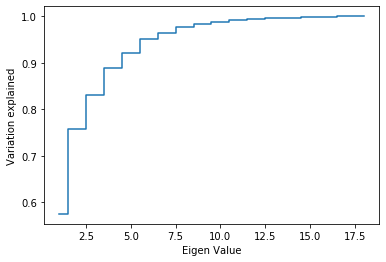

In [278]:
plt.step(list(range(1,19)),np.cumsum(pca.explained_variance_ratio_), where='mid')
plt.ylabel('Variation explained')
plt.xlabel('Eigen Value')
plt.show()

# Dimensionality Reduction

#### To cover 95 % of the variation in original data reducing them from 18 to 6

In [279]:
pca6 = PCA(n_components=6)
pca6.fit(PCA_DataFrame)
print(pca6.components_)
print(pca6.explained_variance_ratio_)
PCA_Transformed = pca6.transform(PCA_DataFrame)

[[ 0.27644934  0.29459089  0.30949603  0.26968224  0.07487016  0.08883004
   0.31572411 -0.31773939  0.31152633  0.28397226  0.30111092  0.31118512
   0.26676361 -0.04641219  0.03936848  0.06041079  0.0446794   0.09183657]
 [-0.11367175  0.148257   -0.05530351 -0.20252995 -0.17249476 -0.03203147
   0.06194258 -0.00301249  0.07375103  0.13819498  0.05407795  0.06421866
   0.22290886  0.45060185 -0.03597909 -0.11963657 -0.54697013 -0.5359997 ]
 [ 0.0691817   0.19215496 -0.07665191 -0.03306479  0.05336229  0.02662137
  -0.09958547  0.08346344 -0.09640209  0.19019653 -0.12095743 -0.09383388
   0.20560299 -0.0730759   0.57439439 -0.68343388  0.11845599  0.05764598]
 [ 0.13309245 -0.06676854  0.0662364  -0.16192182 -0.30877559  0.02139725
   0.01532315  0.05831261  0.03641288 -0.03851308 -0.02361552  0.01601415
  -0.05380551  0.009873    0.73217972  0.54813859 -0.06602826 -0.0163845 ]
 [ 0.06072152 -0.26995396 -0.1310609   0.32188542  0.39840458 -0.32997698
   0.09938621 -0.14726853  0.07234

In [280]:
#Transformation from 18 to 6 columns
PCA_Transformed_df=pd.DataFrame(PCA_Transformed)

In [281]:
PCA_Transformed_df.head()

0         1         2         3         4         5
0  0.407521 -0.241504  0.209312 -0.330751 -0.369995 -1.561668
1 -1.503782 -0.408476  0.203379  0.837863 -0.545022  0.134706
2  3.820576  0.329257  1.163144  0.654802  0.901903 -0.225179
3 -1.572890 -2.850792  0.429707 -0.229466 -0.639217  0.301055
4  5.781440  3.972391 -0.840294  0.254641  1.052131  2.394992

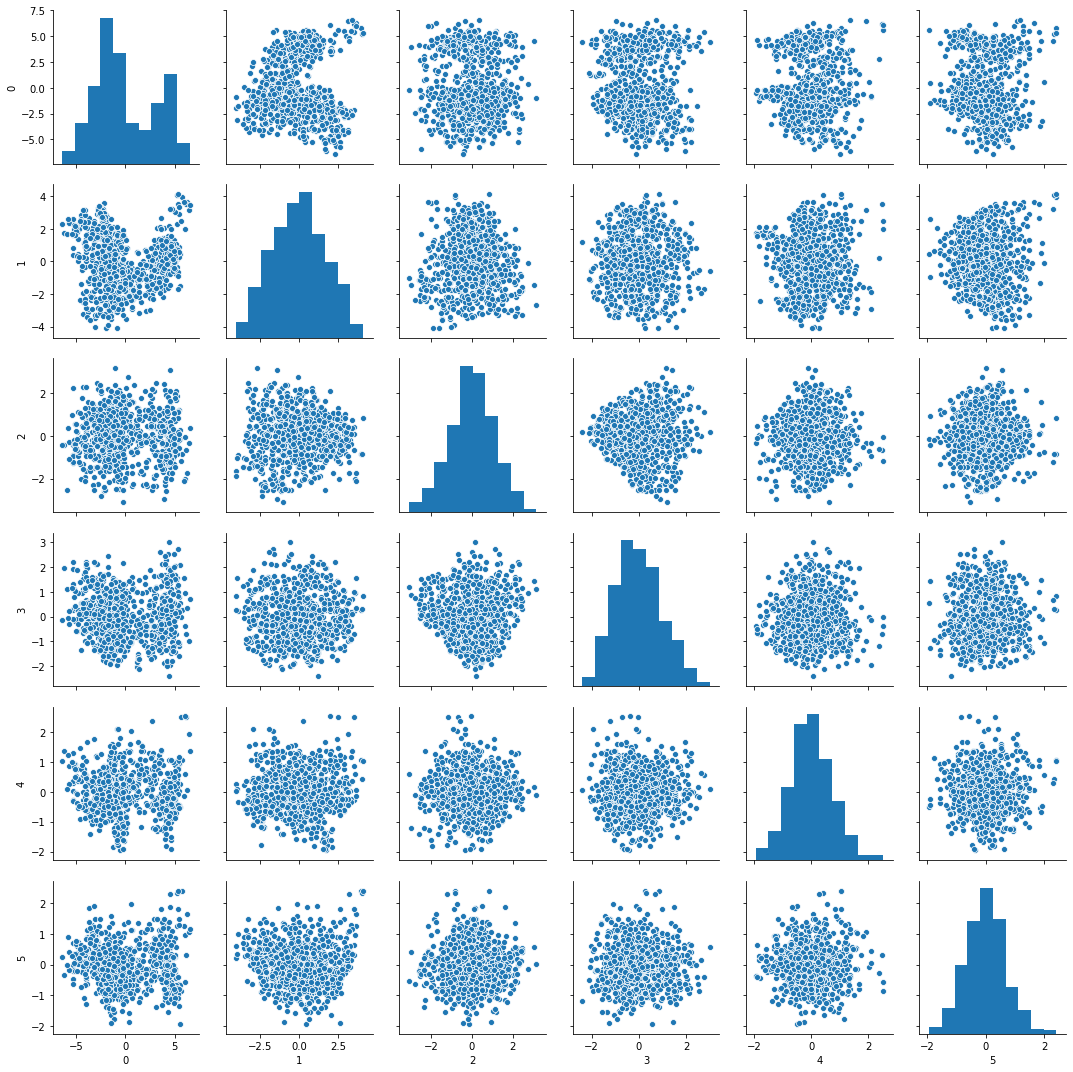

In [282]:
# Pairplot after dimensionality reduction
sns.pairplot(PCA_Transformed_df)

### The correlation has been reduced much among the independent variables

### SVM model without PCA 

In [283]:
#Assign Independent variable in X 
X=DataFrame.drop(['class'],axis=1)

In [284]:
#Converting categorical text to value
replaceStruct={'class':{'car':0,'van':1,'bus':2}}

DataFrame.replace(replaceStruct, inplace=True)

Y=DataFrame['class']
Y.head()

0    1
1    1
2    0
3    1
5    2
Name: class, dtype: int64

In [285]:
#Splitting the the data in to train and test data
Xtrain,Xtest,ytrain,ytest=train_test_split(X,Y,test_size=0.3,random_state=1)

In [286]:
# Building the model
svcmodel=SVC()
#Fitting the data in the model

svcmodel.fit(Xtrain,ytrain)

SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='rbf',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

In [287]:
#Predict the test data with model
Ypred=svcmodel.predict(Xtest)

In [288]:
# Scores for the model 
Traindata_Score=svcmodel.score(Xtrain,ytrain)
print("Train data score:  {0:.2f}%".format(Traindata_Score*100))
Testdatascore=svcmodel.score(Xtest,ytest)
print("Test Data score: {0:.2f}%".format(Testdatascore*100))

MSE=1-Traindata_Score

recallscore=metrics.recall_score(ytest,Ypred,average='macro')
percisionscore=metrics.precision_score(ytest,Ypred,average='macro')
f1score=metrics.f1_score(ytest,Ypred,average='macro')
print("Misclassification error: {0:.1f}%".format(MSE*100))
print("Percission:{0:.2f}%".format(percisionscore*100))
print("Recall score: {0:.2f}%".format(recallscore*100))
print("f1 score: {0:.2f}%".format(f1score*100))

Train data score:  98.09%
Test Data score: 97.98%
Misclassification error: 1.9%
Percission:97.67%
Recall score: 97.47%
f1 score: 97.56%


### SVM  on PCA Performed data with Hyper parameterization and cross validation

In [289]:
#PCA_Transformed independent value as X
X=PCA_Transformed_df

In [290]:
#Dependent variable class is assigned to Y
Y=DataFrame['class']

### Kfold Cross validation

In [291]:
# Splitting a dataset of 25 observations into 5 folds
from sklearn.model_selection import KFold
Kfold = KFold(n_splits=10)
Kfold.get_n_splits(X)
print(Kfold)


for train_index, test_index in Kfold.split(X):
    print("Training data:", train_index, "Testing data:", test_index)
    Xtrain, Xtest = X.iloc[train_index], X.iloc[test_index]
    ytrain, ytest = Y.iloc[train_index], Y.iloc[test_index]

KFold(n_splits=10, random_state=None, shuffle=False)
Training data: [ 83  84  85  86  87  88  89  90  91  92  93  94  95  96  97  98  99 100
 101 102 103 104 105 106 107 108 109 110 111 112 113 114 115 116 117 118
 119 120 121 122 123 124 125 126 127 128 129 130 131 132 133 134 135 136
 137 138 139 140 141 142 143 144 145 146 147 148 149 150 151 152 153 154
 155 156 157 158 159 160 161 162 163 164 165 166 167 168 169 170 171 172
 173 174 175 176 177 178 179 180 181 182 183 184 185 186 187 188 189 190
 191 192 193 194 195 196 197 198 199 200 201 202 203 204 205 206 207 208
 209 210 211 212 213 214 215 216 217 218 219 220 221 222 223 224 225 226
 227 228 229 230 231 232 233 234 235 236 237 238 239 240 241 242 243 244
 245 246 247 248 249 250 251 252 253 254 255 256 257 258 259 260 261 262
 263 264 265 266 267 268 269 270 271 272 273 274 275 276 277 278 279 280
 281 282 283 284 285 286 287 288 289 290 291 292 293 294 295 296 297 298
 299 300 301 302 303 304 305 306 307 308 309 310 311 312

In [292]:
#Hyper parameters with two kernel variables (linear and rbf) and 4 C values (0.01,0.05,0.5,1)
parameters = {'kernel':('linear', 'rbf'), 'C':[0.01, 0.05, 0.5, 1]}
svc = svm.SVC()
clf = GridSearchCV(svc, parameters)
clf.fit(Xtrain,ytrain)
clf.best_params_

{'C': 1, 'kernel': 'rbf'}

#### The model is best with C value 1 and rbf as kernel

In [293]:
#Fitting the data with the model
svcmodel_PCA=SVC(C=1, kernel= 'rbf')
svcmodel_PCA.fit(Xtrain,ytrain)
scores = cross_val_score(svcmodel_PCA, X, Y, cv=5,scoring='f1_macro')
scores

array([0.89538665, 0.85269266, 0.88906724, 0.85691349, 0.87060911])

In [294]:
#Predicting with model
Ypred=svcmodel_PCA.predict(Xtest)

In [296]:
# Scores for the model 
Traindata_Score=svcmodel_PCA.score(Xtrain,ytrain)
print("Train data score:  {0:.2f}%".format(Traindata_Score*100))
Testdatascore=svcmodel_PCA.score(Xtest,ytest)
print("Test Data score: {0:.2f}%".format(Testdatascore*100))

MSE=1-Traindata_Score

recallscore=metrics.recall_score(ytest,Ypred,average='macro')
percisionscore=metrics.precision_score(ytest,Ypred,average='macro')
f1score=metrics.f1_score(ytest,Ypred,average='macro')
print("Misclassification error: {0:.1f}%".format(MSE*100))
print("Percission:{0:.2f}%".format(percisionscore*100))
print("Recall score: {0:.2f}%".format(recallscore*100))
print("f1 score: {0:.2f}%".format(f1score*100))

Train data score:  90.57%
Test Data score: 85.37%
Misclassification error: 9.4%
Percission:84.48%
Recall score: 85.85%
f1 score: 84.97%


### Conclusion
####  PCA dimension reduction from 18 to 6 with approx of 95% variance coverage
#### Hyper parameter done with C value and Kernel and found C value 1 and rbf kernel found best among provided
#### K-fold cross validation performed 
#### PCA performed data requires less computation than the Normal Data
#### Accuracy drops to some extend for the PCA perfomed Data 

## Additional Part (Classification using un-supervised learning)

Text(0.5, 1.0, 'Selecting k with the Elbow Method')

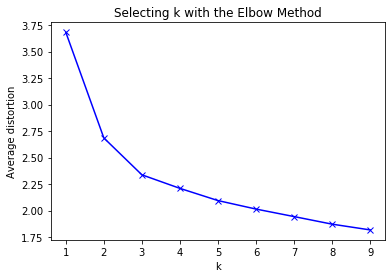

In [297]:
#Finding optimal no. of clusters
from scipy.spatial.distance import cdist
clusters=range(1,10)
meanDistortions=[]

for k in clusters:
    model=KMeans(n_clusters=k)
    model.fit(PCA_Transformed_df)
    prediction=model.predict(PCA_Transformed_df)
    meanDistortions.append(sum(np.min(cdist(PCA_Transformed_df, model.cluster_centers_, 'euclidean'), axis=1)) / PCA_Transformed_df.shape[0])


plt.plot(clusters, meanDistortions, 'bx-')
plt.xlabel('k')
plt.ylabel('Average distortion')
plt.title('Selecting k with the Elbow Method')

#### Going with elbow point 3 that is k=3

In [298]:
# Model fitting
kmeansmodel=KMeans(3)
kmeansmodel.fit(PCA_Transformed_df)
prediction=kmeansmodel.predict(PCA_Transformed_df)

#Append the prediction in the group
PCA_Transformed_df["GROUP"] = prediction
PCA_Transformed_df["GROUP"] = prediction
print("Groups Assigned : \n")
PCA_Transformed_df.head()

Groups Assigned : 



0         1         2         3         4         5  GROUP
0  0.407521 -0.241504  0.209312 -0.330751 -0.369995 -1.561668      0
1 -1.503782 -0.408476  0.203379  0.837863 -0.545022  0.134706      0
2  3.820576  0.329257  1.163144  0.654802  0.901903 -0.225179      1
3 -1.572890 -2.850792  0.429707 -0.229466 -0.639217  0.301055      0
4  5.781440  3.972391 -0.840294  0.254641  1.052131  2.394992      1

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f922f94ab70>,
      dtype=object)

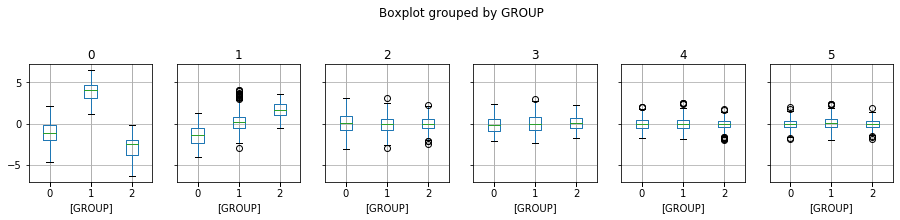

In [299]:
PCA_Transformed_df.groupby(['GROUP'])
PCA_Transformed_df.boxplot(by='GROUP', layout = (4,6),figsize=(15,10))

In [300]:
score=metrics.silhouette_score(PCA_Transformed_df, kmeansmodel.labels_, metric='euclidean')
print("The silhouette scores is "+str(score*100))

The silhouette scores is 37.41302385645082
